<h1>Importanción 

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score




In [94]:
datos = pd.read_csv('Titanic-Dataset.csv')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


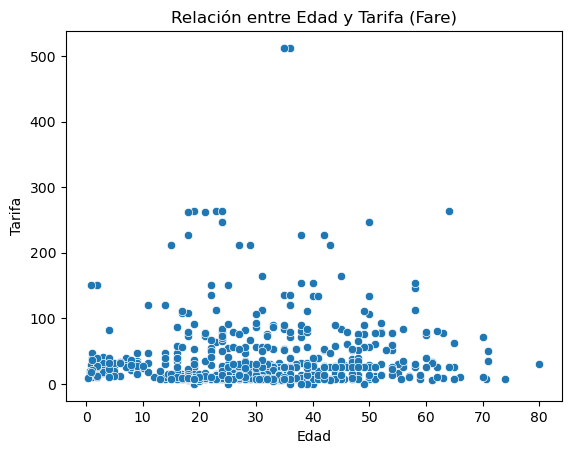

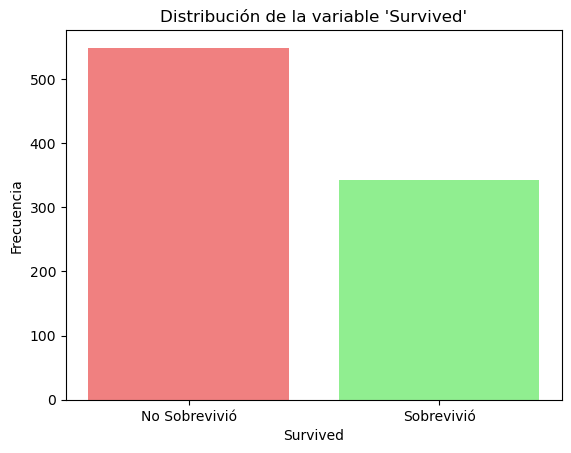

In [97]:
print(datos.head())
# Relación entre edad y tarifa
sns.scatterplot(x='Age', y='Fare', data=datos)
plt.title('Relación entre Edad y Tarifa (Fare)')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

# Gráfico de barras para la distribución de la variable objetivo utilizando matplotlib
survived_counts = datos['Survived'].value_counts()

plt.bar(survived_counts.index, survived_counts.values, color=['lightcoral', 'lightgreen'])
plt.title("Distribución de la variable 'Survived'")
plt.xlabel("Survived")
plt.ylabel("Frecuencia")
plt.xticks(ticks=[0, 1], labels=['No Sobrevivió', 'Sobrevivió'])
plt.show()

<h1>Preprocesamiento

In [102]:
# 4. Preprocesamiento de Datos
# Verificar valores faltantes por columna
print("\nValores faltantes por columna:")
print(datos.isnull().sum())

# Imputar valores faltantes en 'Age' con la mediana por supervivencia
datos['Age'] = datos.groupby('Survived')['Age'].transform(lambda x: x.fillna(x.median()))

# Si 'Embarked' aún existe, rellenar valores faltantes con el valor más frecuente
if 'Embarked' in datos.columns:
    datos['Embarked'] = datos['Embarked'].fillna(datos['Embarked'].mode()[0])

# Verificar si 'Cabin' existe antes de intentar rellenar valores faltantes
if 'Cabin' in datos.columns:
    datos['Cabin'] = datos['Cabin'].fillna('Unknown')

# Convertir variables categóricas en variables dummy solo si no se ha hecho antes
# Comprobar si las columnas 'Sex' o 'Embarked' están presentes y si las variables dummy ya existen
if 'Sex' in datos.columns and 'Sex_male' not in datos.columns:
    datos = pd.get_dummies(datos, columns=['Sex'], drop_first=True)

if 'Embarked' in datos.columns and 'Embarked_Q' not in datos.columns and 'Embarked_S' not in datos.columns:
    datos = pd.get_dummies(datos, columns=['Embarked'], drop_first=True)

# Eliminar columnas irrelevantes si existen
columnas_a_eliminar = ['PassengerId', 'Name', 'Ticket', 'Cabin']
# Asegurarse de que las columnas a eliminar existen en el DataFrame
datos.drop(columns=[col for col in columnas_a_eliminar if col in datos.columns], inplace=True)

# Verificar nuevamente los valores faltantes
print("\nValores faltantes después del preprocesamiento:")
print(datos.isnull().sum())




Valores faltantes por columna:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Valores faltantes después del preprocesamiento:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


<h1> Caracterisitcas

In [106]:
# 5. Selección de Características
caracteristicas = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
objetivo = 'Survived'

X = datos[caracteristicas]
y = datos[objetivo]

# Verificar si las características están presentes en el DataFrame
print("\nColumnas disponibles en el DataFrame:")
print(datos.columns)



Columnas disponibles en el DataFrame:
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


<h1>Division 

In [107]:
# 6. División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_test)
print(y_train)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
565       3  24.0      2      0  24.1500      True       False        True
160       3  44.0      0      1  16.1000      True       False        True
553       3  22.0      0      0   7.2250      True       False       False
860       3  41.0      2      0  14.1083      True       False        True
241       3  28.0      1      0  15.5000     False        True       False
..      ...   ...    ...    ...      ...       ...         ...         ...
880       2  25.0      0      1  26.0000     False       False        True
91        3  20.0      0      0   7.8542      True       False        True
883       2  28.0      0      0  10.5000      True       False        True
473       2  23.0      0      0  13.7917     False       False       False
637       2  31.0      1      1  26.2500      True       False        True

[179 rows x 8 columns]
692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736 

<h1>Entrenamiento

In [108]:
# 7. Entrenamiento del Modelo (Regresión Logística)
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

<h1>Evaluacion 

In [109]:
# 8. Evaluación del Modelo
y_pred = modelo.predict(X_test)

# Métricas de evaluación
exactitud = accuracy_score(y_test, y_pred)
precisión = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nMétricas de Evaluación:")
print(f"Exactitud: {exactitud:.2f}")
print(f"Precisión: {precisión:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Métricas de Evaluación:
Exactitud: 0.80
Precisión: 0.79
Recall: 0.67
F1-Score: 0.72

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<h1>Visualizacion

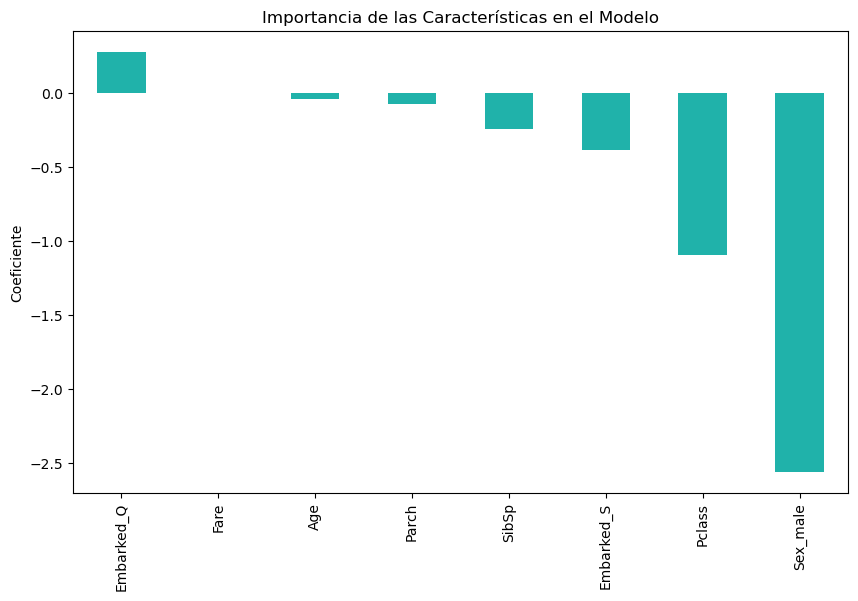

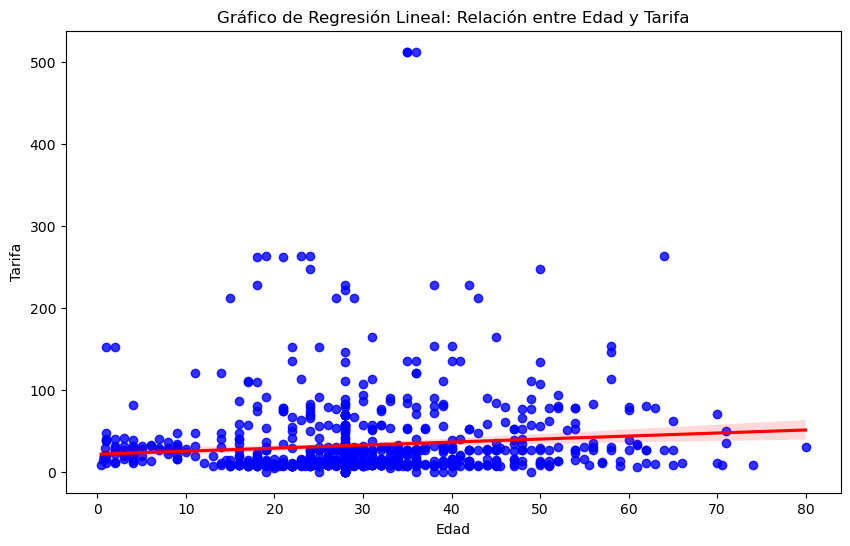

In [110]:
# 9. Visualización de Resultados
# Gráfico de barras de la importancia de las características
coeficientes = pd.Series(modelo.coef_[0], index=caracteristicas)
coeficientes.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='lightseagreen')
plt.title("Importancia de las Características en el Modelo")
plt.ylabel("Coeficiente")
plt.show()
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(data=datos, x="Age", y="Fare", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Gráfico de Regresión Lineal: Relación entre Edad y Tarifa")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()